# Data Wrangling
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis. In this section, we will learn how to load data into Python, how to manipulate data, and how to clean data.
It is the process of cleaning, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making. in an unstructured data format into a structured data format. data wrangling helps to make data more accessible and useful for analysis and decision making. 

## Steps
1. Data Collection (Data Extraction, What data)
2. Tools to clean data(which things to use for cleaning) Libraries - Libraries
3. How to clean data (Steps to clean data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.drop(columns='deck', inplace=True)

In [6]:
df['age'] = df.age.fillna(value = df['age'].mean())

In [9]:
# Its categorical data so we can't fill it with mean, use mode
df['embarked'] = df.age.fillna(value = df['embarked'].mode())

In [10]:
df.isnull().sum() / len(df)*100

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.224467
alive          0.000000
alone          0.000000
dtype: float64

## Outliers Removal

## Visualization Method

<AxesSubplot: xlabel='age'>

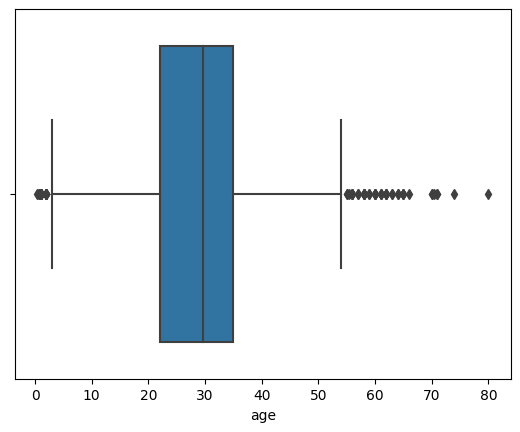

In [11]:
import seaborn as sns

sns.boxplot(data=df, x='age', hue='sex')

In [17]:
# IQR Method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

df_final=df[(df['age'] > (Q1-1.5*IQR)) & (df['age'] < (Q3+1.5*IQR))]
df_final
# How remove IQR with levels ? 


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,22.000000,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,38.000000,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,26.000000,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,35.000000,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,35.000000,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,27.000000,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,19.000000,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,29.699118,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,26.000000,First,man,True,Cherbourg,yes,True


In [ ]:

df_final
# How remove IQR with levels ? 


In [19]:
df_final.shape


(825, 14)

In [20]:
# IQR Method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

df_final=df[(df['fare'] > (Q1-1.5*IQR)) & (df['fare'] < (Q3+1.5*IQR))]

In [21]:
df_final.shape

(775, 14)

In [24]:
# Z-Score Method

from scipy import stats
import numpy as np

zscore = np.abs(stats.zscore(df['age']))
threshold = 3
df = df[(z < threshold).all(axis=1)]

SyntaxError: invalid syntax (1903115459.py, line 2)

## Finding and Dropping Duplicates

In [25]:
# finding duplicates
df.drop_duplicates(inplace=True)

In [26]:
# finding and dropping duplicates

# finding duplicates
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

0

In [33]:
df_duplicated = df[df.duplicated()]
df_duplicated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# finding duplicates
df_duplicated.duplicated().sum()

54

In [38]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [36]:
df_duplicated.shape

(53, 15)

In [39]:
df.shape

(784, 15)

# Data Normalization

- To bring data on scale of 0 to 1

In [ ]:
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# from sklearn.preprocessing import StandardScaler   # we can do same work using standard scaler
#2. Load the data
df

#3. Select columns to normalize
cols_to_normalize = ['age', 'fare']

#4. create scaler function/tool
scaler = MinMaxScaler()

#5. fit and transform the data using the scaler or vice versa

df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

#6. view the data
df

- In standard scaler there is a role of s

In [ ]:
x_standardized = (df - df.mean()) / df.std()
x_standardized


## Log Transformation

In [ ]:
#1. import libraries
#pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import log
#2. data
df
#3. select columns to normalize
cols_to_normalize = ['age', 'fare']
#4. create the scaler function/tool
scaler = StandardScaler()
#5 fit and transform the data on scaler or vice versa
df[cols_to_normalize] =scaler.fit_transform(df[cols_to_normalize])
#6 check the data
df